In [1]:
import pandas as pd
from lightgbm import LGBMRegressor
import gc
from numerapi import NumerAPI
from halo import Halo
from utils import save_model, load_model, neutralize, get_biggest_change_features, validation_metrics, download_data



napi = NumerAPI()
spinner = Halo(text='', spinner='dots')

current_round = napi.get_current_round(tournament=8)  # tournament 8 is the primary Numerai Tournament
print(current_round)

# read in all of the new datas
# tournament data and example predictions change every week so we specify the round in their names
# training and validation data only change periodically, so no need to download them over again every single week
napi.download_dataset("numerai_training_data_int8.parquet", "numerai_training_data_int8.parquet")
napi.download_dataset("numerai_tournament_data_int8.parquet", f"numerai_tournament_data_{current_round}_int8.parquet")
napi.download_dataset("numerai_validation_data_int8.parquet", f"numerai_validation_data_int8.parquet")
napi.download_dataset("example_predictions.parquet", f"example_predictions_{current_round}.parquet")
napi.download_dataset("example_validation_predictions.parquet", "example_validation_predictions.parquet")

spinner.start('Reading parquet data')
training_data = pd.read_parquet('numerai_training_data_int8.parquet')
tournament_data = pd.read_parquet(f'numerai_tournament_data_{current_round}_int8.parquet')
validation_data = pd.read_parquet('numerai_validation_data_int8.parquet')
example_preds = pd.read_parquet(f'example_predictions_{current_round}.parquet')
validation_preds = pd.read_parquet('example_validation_predictions.parquet')
spinner.succeed()

EXAMPLE_PREDS_COL = "example_preds"
validation_data[EXAMPLE_PREDS_COL] = validation_preds["prediction"]

TARGET_COL = "target"
ERA_COL = "era"

# all feature columns start with the prefix "feature_"
#feature_cols = [c for c in training_data if c.startswith("feature_")]

gc.collect()

288


2021-10-31 06:36:36,411 INFO numerapi.utils: target file already exists
2021-10-31 06:36:36,413 INFO numerapi.utils: download complete
2021-10-31 06:36:37,353 INFO numerapi.utils: starting download
numerai_tournament_data_288_int8.parquet:  99%|█████████▊| 574M/582M [00:12<00:00, 50.8MB/s]2021-10-31 06:36:51,235 INFO numerapi.utils: target file already exists
2021-10-31 06:36:51,237 INFO numerapi.utils: download complete
2021-10-31 06:36:52,147 INFO numerapi.utils: starting download

example_predictions_288.parquet:   0%|          | 0.00/33.5M [00:00<?, ?B/s]
example_predictions_288.parquet:   0%|          | 2.05k/33.5M [00:00<39:18, 14.2kB/s]
example_predictions_288.parquet:   0%|          | 44.0k/33.5M [00:00<03:11, 174kB/s] 
example_predictions_288.parquet:   0%|          | 95.2k/33.5M [00:00<02:12, 252kB/s]
example_predictions_288.parquet:   1%|          | 200k/33.5M [00:00<01:07, 495kB/s] 
example_predictions_288.parquet:   1%|▏         | 425k/33.5M [00:00<00:32, 1.00MB/s]
example

\ Reading parquet data

example_predictions_288.parquet: 33.5MB [00:02, 11.7MB/s]                            


/ Reading parquet data

numerai_tournament_data_288_int8.parquet: 582MB [00:22, 25.9MB/s]                           


v Reading parquet data


0

In [2]:
f=['feature_haziest_lifelike_horseback', 'feature_glare_factional_assessment', 'feature_exorbitant_myeloid_crinkle', 'feature_travelled_semipermeable_perruquier', 'feature_branched_dilatory_sunbelt', 'feature_moralistic_heartier_typhoid', 'feature_introvert_symphysial_assegai', 'feature_gullable_sanguine_incongruity', 'feature_agile_unrespited_gaucho', 'feature_canalicular_peeling_lilienthal', 'feature_unvaried_social_bangkok', 'feature_lofty_acceptable_challenge', 'feature_grandmotherly_circumnavigable_homonymity', 'feature_undivorced_unsatisfying_praetorium', 'feature_unaired_operose_lactoprotein']
f+=['feature_travelled_semipermeable_perruquier', 'feature_planned_superimposed_bend', 'feature_moralistic_heartier_typhoid', 'feature_crowning_frustrate_kampala', 'feature_unaired_operose_lactoprotein', 'feature_flintier_enslaved_borsch', 'feature_cambial_bigoted_bacterioid', 'feature_jerkwater_eustatic_electrocardiograph', 'feature_unvaried_social_bangkok', 'feature_communicatory_unrecommended_velure', 'feature_lofty_acceptable_challenge', 'feature_grandmotherly_circumnavigable_homonymity', 'feature_antichristian_slangiest_idyllist', 'feature_assenting_darn_arthropod', 'feature_haziest_lifelike_horseback', 'feature_exorbitant_myeloid_crinkle', 'feature_beery_somatologic_elimination', 'feature_silver_handworked_scauper', 'feature_canalicular_peeling_lilienthal', 'feature_undivorced_unsatisfying_praetorium']
f+=['feature_glare_factional_assessment', 'feature_travelled_semipermeable_perruquier', 'feature_moralistic_heartier_typhoid', 'feature_stylistic_honduran_comprador', 'feature_crowning_frustrate_kampala', 'feature_unaired_operose_lactoprotein', 'feature_flintier_enslaved_borsch', 'feature_unvaried_social_bangkok', 'feature_apomictical_motorized_vaporisation', 'feature_lofty_acceptable_challenge', 'feature_antichristian_slangiest_idyllist', 'feature_store_apteral_isocheim', 'feature_unforbidden_highbrow_kafir', 'feature_buxom_curtained_sienna', 'feature_haziest_lifelike_horseback', 'feature_exorbitant_myeloid_crinkle', 'feature_silver_handworked_scauper', 'feature_canalicular_peeling_lilienthal', 'feature_introvert_symphysial_assegai', 'feature_univalve_abdicant_distrail', 'feature_undivorced_unsatisfying_praetorium']
f+=['feature_glare_factional_assessment', 'feature_unsealed_suffixal_babar', 'feature_travelled_semipermeable_perruquier', 'feature_moralistic_heartier_typhoid', 'feature_twisty_adequate_minutia', 'feature_flintier_enslaved_borsch', 'feature_slack_calefacient_tableau', 'feature_bhutan_imagism_dolerite', 'feature_unvaried_social_bangkok', 'feature_communicatory_unrecommended_velure', 'feature_lofty_acceptable_challenge', 'feature_grandmotherly_circumnavigable_homonymity', 'feature_chuffier_analectic_conchiolin', 'feature_antichristian_slangiest_idyllist', 'feature_unwonted_trusted_fixative', 'feature_haziest_lifelike_horseback', 'feature_exorbitant_myeloid_crinkle', 'feature_beery_somatologic_elimination', 'feature_winsome_irreproachable_milkfish', 'feature_gullable_sanguine_incongruity', 'feature_silver_handworked_scauper', 'feature_canalicular_peeling_lilienthal', 'feature_introvert_symphysial_assegai', 'feature_undivorced_unsatisfying_praetorium']

feature_cols = list(set(f))
len(feature_cols)

38

In [3]:
def create_lgbm_regressor(model_name:str):
    model = load_model(model_name)
    if not model:
        print(f"model not found, training new one")
        params = {"n_estimators": 2000,
                "learning_rate": 0.01,
                "max_depth": 5,
                "num_leaves": 2 ** 5,
                "colsample_bytree": 0.1}

        model = LGBMRegressor(**params)

        # train on all of train, predict on val, predict on tournament, save the model so we don't have to train next time
        spinner.start('Training model')
        model.fit(training_data.loc[:, feature_cols], training_data[TARGET_COL])
        print(f"saving new model: {model_name}")
        save_model(model, model_name)
        spinner.succeed()

    # check for nans and fill nans
    if tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum().sum():
        cols_w_nan = tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum()
        total_rows = tournament_data[tournament_data["data_type"] == "live"]
        print(f"Number of nans per column this week: {cols_w_nan[cols_w_nan > 0]}")
        print(f"out of {total_rows} total rows")
        print(f"filling nans with 0.5")
        tournament_data.loc[:, feature_cols].fillna(0.5, inplace=True)
    else:
        print("No nans in the features this week!")

    return model


In [4]:
def save_prediction(model, model_name, neutralize_proportion = 0.8, is_xgbRanker = False, use_pool = False):
    spinner.start('Predicting on latest data')
    # double check the feature that the model expects vs what is available
    # this prevents our pipeline from failing if Numerai adds more data and we don't have time to retrain!


    try:
        model_expected_features = model.booster_.feature_name()
    except:
        try:
            model_expected_features = model.get_booster().feature_names
        except:
            model_expected_features = model.feature_names_
        
    if set(model_expected_features) != set(feature_cols):
        print(f"New features are available! Might want to retrain model {model_name}.")

    if not use_pool:
        # if is_xgbRanker:
            
        #     for era in validation_data.era.unique():
        #         print(f"predicting valid era:{era}")
        #         validation_data.loc[validation_data.era == era, f"preds_{model_name}"] = \
        #             model.predict(validation_data.loc[validation_data.era == era, model_expected_features])

        #     for era in tournament_data.era.unique():
        #         print(f"predicting tournament era:{era}")
        #         tournament_data.loc[tournament_data.era == era, f"preds_{model_name}"] = \
        #             model.predict(tournament_data.loc[tournament_data.era == era, model_expected_features])
        # else:
        validation_data.loc[:, f"preds_{model_name}"] = model.predict(validation_data.loc[:, model_expected_features])
        tournament_data.loc[:, f"preds_{model_name}"] = model.predict(tournament_data.loc[:, model_expected_features])
    else:
        #catboost ranker is not compayible with sklearn

        test_pool = Pool(
            data=validation_data.loc[:, feature_cols],
            label=validation_data[TARGET_COL],
            group_id=validation_data.era
        )
        validation_data.loc[:, f"preds_{model_name}"] = model.predict(test_pool)

        tournament_pool = Pool (
            data = tournament_data.loc[:, model_expected_features],
            group_id = tournament_data.era
        )

        tournament_data.loc[:, f"preds_{model_name}"] = model.predict(tournament_pool)

    spinner.succeed()

    spinner.start('Neutralizing to risky features')
    # getting the per era correlation of each feature vs the target
    all_feature_corrs = training_data.groupby(ERA_COL).apply(lambda d: d[feature_cols].corrwith(d[TARGET_COL]))

    # find the riskiest features by comparing their correlation vs the target in half 1 and half 2 of training data
    riskiest_features = get_biggest_change_features(all_feature_corrs, 50)

    # neutralize our predictions to the riskiest features
    validation_data[f"preds_{model_name}_neutral_riskiest_50"] = neutralize(df=validation_data,
                                                                            columns=[f"preds_{model_name}"],
                                                                            neutralizers=riskiest_features,
                                                                            proportion=neutralize_proportion,
                                                                            normalize=True,
                                                                            era_col=ERA_COL)

    tournament_data[f"preds_{model_name}_neutral_riskiest_50"] = neutralize(df=tournament_data,
                                                                            columns=[f"preds_{model_name}"],
                                                                            neutralizers=riskiest_features,
                                                                            proportion=neutralize_proportion,
                                                                            normalize=True,
                                                                            era_col=ERA_COL)
    spinner.succeed()

    model_to_submit = f"preds_{model_name}_neutral_riskiest_50"

    # rename best model to prediction and rank from 0 to 1 to meet diagnostic/submission file requirements
    validation_data["prediction"] = validation_data[model_to_submit].rank(pct=True)
    tournament_data["prediction"] = tournament_data[model_to_submit].rank(pct=True)
    validation_data["prediction"].to_csv(f"validation_predictions_{current_round}_{model_to_submit}.csv")
    tournament_data["prediction"].to_csv(f"tournament_predictions_{current_round}_{model_to_submit}.csv")

    # get some stats about each of our models to compare...
    # fast_mode=True so that we skip some of the stats that are slower to calculate
    validation_stats = validation_metrics(validation_data, [model_to_submit], example_col=EXAMPLE_PREDS_COL, fast_mode=True)
    print(validation_stats[["mean", "sharpe"]].to_markdown())

In [5]:
#Blitter4 XGBRank
from xgboost import XGBRanker
from collections import Counter


def create_xgb_ranker(model_name:str):
    model = load_model(model_name)
    if not model:
        print(f"model not found, training new one")

                        
        model = XGBRanker(max_depth=5, learning_rate=0.01, n_estimators=2000, n_jobs=-1, colsample_bytree=0.1)
        # cdf = training_data.groupby('era').agg(['count'])
        # group = cdf[cdf.columns[0]].values
        # del cdf
        group = Counter(training_data.era).values()

        # train on all of train, predict on val, predict on tournament, save the model so we don't have to train next time
        spinner.start('Training model')
        model.fit(training_data.loc[:, feature_cols], training_data[TARGET_COL], group=group)
        print(f"saving new model: {model_name}")
        save_model(model, model_name)
        spinner.succeed()

    # check for nans and fill nans
    if tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum().sum():
        cols_w_nan = tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum()
        total_rows = tournament_data[tournament_data["data_type"] == "live"]
        print(f"Number of nans per column this week: {cols_w_nan[cols_w_nan > 0]}")
        print(f"out of {total_rows} total rows")
        print(f"filling nans with 0.5")
        tournament_data.loc[:, feature_cols].fillna(0.5, inplace=True)
    else:
        print("No nans in the features this week!")

    return model

In [6]:
from xgboost import XGBRegressor

def create_xgb_regressor(model_name:str):
    model = load_model(model_name)
    if not model:
        print(f"model not found, training new one")
        params = {"n_estimators": 2000,
                "learning_rate": 0.01,
                "max_depth": 5,
                "num_leaves": 2 ** 5,
                "colsample_bytree": 0.1}

        model = XGBRegressor(max_depth=5, learning_rate=0.01, \
                        n_estimators=2000, colsample_bytree=0.1) #provar regularitzacions

        # train on all of train, predict on val, predict on tournament, save the model so we don't have to train next time
        spinner.start('Training model')
        model.fit(training_data.loc[:, feature_cols], training_data[TARGET_COL])
        print(f"saving new model: {model_name}")
        save_model(model, model_name)
        spinner.succeed()

    # check for nans and fill nans
    if tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum().sum():
        cols_w_nan = tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum()
        total_rows = tournament_data[tournament_data["data_type"] == "live"]
        print(f"Number of nans per column this week: {cols_w_nan[cols_w_nan > 0]}")
        print(f"out of {total_rows} total rows")
        print(f"filling nans with 0.5")
        tournament_data.loc[:, feature_cols].fillna(0.5, inplace=True)
    else:
        print("No nans in the features this week!")

    return model

In [7]:
#BLITTER5 - Catboost regressor
from catboost import CatBoostRegressor

def create_catboost_regressor(model_name:str):

    model = load_model(model_name)
    if not model:
        print(f"model not found, training new one")

        model = CatBoostRegressor(max_depth=5, learning_rate=0.01, \
                        n_estimators=2000, rsm=0.1) #provar regularitzacions

        # train on all of train, predict on val, predict on tournament, save the model so we don't have to train next time
        spinner.start('Training model')
        model.fit(training_data.loc[:, feature_cols], training_data[TARGET_COL])
        print(f"saving new model: {model_name}")
        save_model(model, model_name)
        spinner.succeed()

    # check for nans and fill nans
    if tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum().sum():
        cols_w_nan = tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum()
        total_rows = tournament_data[tournament_data["data_type"] == "live"]
        print(f"Number of nans per column this week: {cols_w_nan[cols_w_nan > 0]}")
        print(f"out of {total_rows} total rows")
        print(f"filling nans with 0.5")
        tournament_data.loc[:, feature_cols].fillna(0.5, inplace=True)
    else:
        print("No nans in the features this week!")
    return model

In [8]:
from catboost import CatBoostRanker, Pool

def create_catboost_ranker(model_name : str, loss_function : str, plot = True, verbose = False):
    gc.collect()
    print(f"predicting {model_name}")
    model = load_model(model_name)
    if not model:
        print(f"model not found, training new one")
        parameters = {
            'iterations': 200,
            'custom_metric': ['NDCG', 'PFound'],
            'verbose': verbose,
            'random_seed': 0,
            'rsm' : 0.1,
            'learning_rate' : 0.01,
            'loss_function' : loss_function,
            #'train_dir' : loss_function
        }

        train_pool = Pool(
            data=training_data.loc[:, feature_cols],
            label=training_data[TARGET_COL],
            group_id=training_data.era
        )

        test_pool = Pool(
            data=validation_data.loc[:, feature_cols],
            label=validation_data[TARGET_COL],
            group_id=validation_data.era
        )

        model = CatBoostRanker(**parameters)


        # train on all of train, predict on val, predict on tournament, save the model so we don't have to train next time
        #spinner.start('Training model')
        model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=10, plot=plot)

        print(f"saving new model: {model_name}")
        save_model(model, model_name)
        #spinner.succeed()

    # check for nans and fill nans
    if tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum().sum():
        cols_w_nan = tournament_data.loc[tournament_data["data_type"] == "live", feature_cols].isna().sum()
        total_rows = tournament_data[tournament_data["data_type"] == "live"]
        print(f"Number of nans per column this week: {cols_w_nan[cols_w_nan > 0]}")
        print(f"out of {total_rows} total rows")
        print(f"filling nans with 0.5")
        tournament_data.loc[:, feature_cols].fillna(0.5, inplace=True)
    else:
        print("No nans in the features this week!")

    return model

In [9]:
model_name = f"blitter"
model = create_lgbm_regressor(model_name)
save_prediction(model, model_name)

No nans in the features this week!
v Predicting on latest data
v Neutralizing to risky features
|                                   |      mean |   sharpe |
|:----------------------------------|----------:|---------:|
| preds_blitter_neutral_riskiest_50 | 0.0228259 |  1.05479 |


In [10]:
model_name = "blitter1" #f"xgboost_bare"
model = create_xgb_regressor(model_name)
save_prediction(model, model_name)

No nans in the features this week!
\ Predicting on latest data

C:\Users\marc\.conda\envs\numerai\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


v Predicting on latest data
v Neutralizing to risky features
|                                    |      mean |   sharpe |
|:-----------------------------------|----------:|---------:|
| preds_blitter1_neutral_riskiest_50 | 0.0241834 |  1.04763 |


In [11]:
#Ensemble Lgbm + XGBoost ja neutralitzzades
model_name = "BLITTER2"

validation_data.loc[:, f"preds_{model_name}"] = validation_data["preds_blitter_neutral_riskiest_50"] * 0.5 + validation_data["preds_blitter1_neutral_riskiest_50"] * 0.5
tournament_data.loc[:, f"preds_{model_name}"] = tournament_data["preds_blitter_neutral_riskiest_50"] * 0.5 + tournament_data["preds_blitter1_neutral_riskiest_50"] * 0.5

model_to_submit = f"preds_{model_name}_neutral_riskiest_50"

validation_data[model_to_submit] = validation_data[f"preds_{model_name}"]
tournament_data[model_to_submit] = tournament_data[f"preds_{model_name}"]


# rename best model to prediction and rank from 0 to 1 to meet diagnostic/submission file requirements
validation_data["prediction"] = validation_data[model_to_submit].rank(pct=True)
tournament_data["prediction"] = tournament_data[model_to_submit].rank(pct=True)

validation_data["prediction"].to_csv(f"validation_predictions_{current_round}_{model_to_submit}.csv")
tournament_data["prediction"].to_csv(f"tournament_predictions_{current_round}_{model_to_submit}.csv")

validation_stats = validation_metrics(validation_data, [model_to_submit], example_col=EXAMPLE_PREDS_COL, fast_mode=True)
print(validation_stats[["mean", "sharpe"]].to_markdown())


|                                    |      mean |   sharpe |
|:-----------------------------------|----------:|---------:|
| preds_BLITTER2_neutral_riskiest_50 | 0.0239164 |  1.06938 |


In [12]:
#Ensemble Lgbm + XGBoost ensemble after rank
model_name = "BLITTER3"

#ensemble on ranks
validation_data.loc[:, f"preds_{model_name}"] = validation_data["preds_blitter_neutral_riskiest_50"].rank(pct=True) + validation_data["preds_blitter1_neutral_riskiest_50"].rank(pct=True) / 2
tournament_data.loc[:, f"preds_{model_name}"] = tournament_data["preds_blitter_neutral_riskiest_50"].rank(pct=True) + tournament_data["preds_blitter1_neutral_riskiest_50"].rank(pct=True) / 2

model_to_submit = f"preds_{model_name}"

#rank again to fix decimals coming from the /2
validation_data["prediction"] = validation_data[model_to_submit].rank(pct=True)
tournament_data["prediction"] = tournament_data[model_to_submit].rank(pct=True)


validation_data["prediction"].to_csv(f"validation_predictions_{current_round}_{model_to_submit}.csv")
tournament_data["prediction"].to_csv(f"tournament_predictions_{current_round}_{model_to_submit}.csv")

validation_stats = validation_metrics(validation_data, [model_to_submit], example_col=EXAMPLE_PREDS_COL, fast_mode=True)
print(validation_stats[["mean", "sharpe"]].to_markdown())

|                |      mean |   sharpe |
|:---------------|----------:|---------:|
| preds_BLITTER3 | 0.0236422 |  1.06787 |


In [13]:
model_name = f"BLITTER4"
model = create_xgb_ranker(model_name)
save_prediction(model, model_name, is_xgbRanker= True)

No nans in the features this week!
\

C:\Users\marc\.conda\envs\numerai\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


v Predicting on latest data
v Neutralizing to risky features
|                                    |      mean |   sharpe |
|:-----------------------------------|----------:|---------:|
| preds_BLITTER4_neutral_riskiest_50 | 0.0217391 | 0.864442 |


<AxesSubplot:>

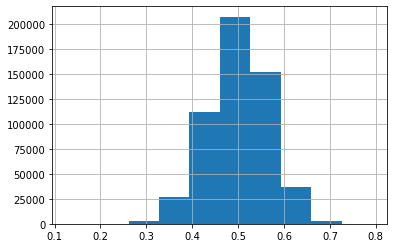

In [14]:
validation_data.loc[:, f"preds_{model_name}"].hist()

In [15]:
model_name = f"BLITTER4"
model = create_xgb_ranker(model_name)
save_prediction(model, model_name, is_xgbRanker= False)

No nans in the features this week!
\

C:\Users\marc\.conda\envs\numerai\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


v Predicting on latest data
v Neutralizing to risky features
|                                    |      mean |   sharpe |
|:-----------------------------------|----------:|---------:|
| preds_BLITTER4_neutral_riskiest_50 | 0.0217391 | 0.864442 |


In [16]:
model_name = f"blitter5"
model = create_catboost_regressor(model_name)
save_prediction(model, model_name)

No nans in the features this week!
v Predicting on latest data
v Neutralizing to risky features
|                                    |      mean |   sharpe |
|:-----------------------------------|----------:|---------:|
| preds_blitter5_neutral_riskiest_50 | 0.0233502 |  0.97543 |


In [17]:
model_name = f"blitter6"
loss_function = "QueryRMSE"

model = create_catboost_ranker(model_name, loss_function)

predicting blitter6
No nans in the features this week!


In [18]:
save_prediction(model, model_name, use_pool =True)

v Predicting on latest data
v Neutralizing to risky features
|                                    |      mean |   sharpe |
|:-----------------------------------|----------:|---------:|
| preds_blitter6_neutral_riskiest_50 | 0.0173495 | 0.855438 |


In [19]:
model_name = f"blitter7"
loss_function = "PairLogit:max_pairs=100000"

model = create_catboost_ranker(model_name, loss_function)


predicting blitter7
No nans in the features this week!


In [20]:
save_prediction(model, model_name, use_pool =True)

v Predicting on latest data
v Neutralizing to risky features
|                                    |      mean |   sharpe |
|:-----------------------------------|----------:|---------:|
| preds_blitter7_neutral_riskiest_50 | 0.0147554 | 0.726439 |


# TODO GroupKfold for non overlapping eras
# optuna optimize

# stacking

LTR over slightly neutralized target